In [54]:
import sys
import yaml
import os
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
from PIL import Image
sys.path.append(os.path.abspath(".."))

In [3]:
# Импортируем функцию для определения корня проекта
sys.path.append(os.path.abspath("../scripts"))
from auxiliary_functions import get_project_root

# Добавляем корень проекта в sys.path
sys.path.append(get_project_root())

from scripts.auxiliary_functions import get_project_paths
from scripts.auxiliary_functions import plot_training_results

In [4]:
project_root = get_project_root()
params_path = os.path.join(project_root, "params.yaml")

with open(params_path, "r") as f:
    params = yaml.safe_load(f)
    paths = get_project_paths()

# Сначала попробумем на сете с небоьльшим кол-вом данных
https://www.kaggle.com/datasets/samuelcortinhas/cats-and-dogs-image-classification/data?select=test

## Загружаем результаты обучения

In [35]:
# Загрузка предсказаний и меток

all_preds = np.load(paths['vectors_dir']/"animal_preds_noaug(ver1).npy")
all_labels = np.load(paths['vectors_dir']/"animal_labels_noaug(ver1).npy")

In [36]:
cm = confusion_matrix(all_labels, all_preds)


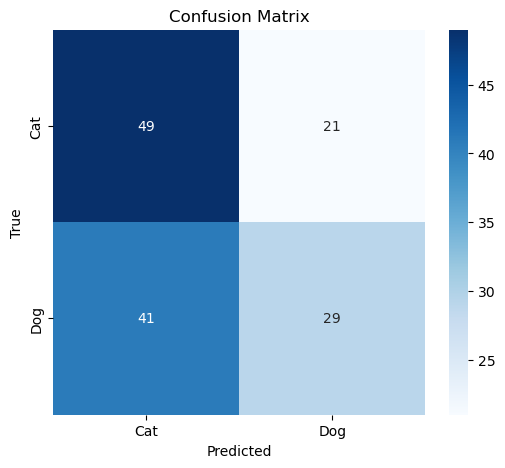

In [38]:
# Визуализация матрицы ошибок
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
Accuracy ≈ (49 + 29) / 140 ≈ 55,71%

### Вывод: Результат такой себе, но сложно ожидать лучше на простой нейросети "без всего"

In [39]:

all_preds_aug = np.load(paths['vectors_dir']/"animal_preds_aug(ver1).npy")
all_labels_aug = np.load(paths['vectors_dir']/"animal_labels_aug(ver1).npy")

In [40]:
cm_aug = confusion_matrix(all_labels_aug, all_preds_aug)


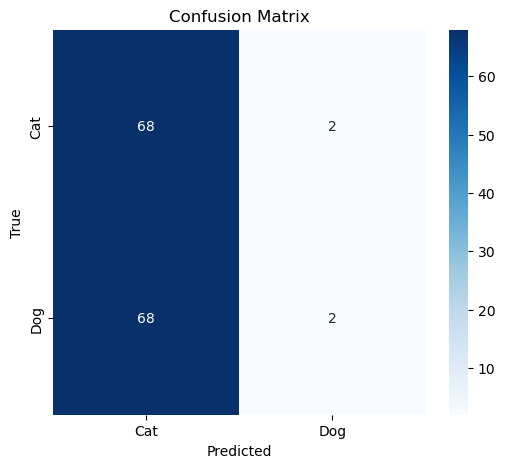

In [42]:
# Визуализация матрицы ошибок
plt.figure(figsize=(6, 5))
sns.heatmap(cm_aug, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
Accuracy ≈ (68 + 2) / 140 ≈ 50%

### Вывод: Аугментация привела к полному переобучению. Наша модель теперь различает только котиков

## Попробуем обучиться на сете с нормальным набором данных
Будем пробовать на https://www.kaggle.com/datasets/chetankv/dogs-cats-images

## Загружаем результаты обучения на чистых данных

In [46]:
# Загрузка предсказаний и меток

all_preds_big = np.load(paths['vectors_dir']/"animal_preds_noaug.npy")
all_labels_big = np.load(paths['vectors_dir']/"animal_labels_noaug.npy")

In [47]:
cm_big = confusion_matrix(all_labels_big, all_preds_big)

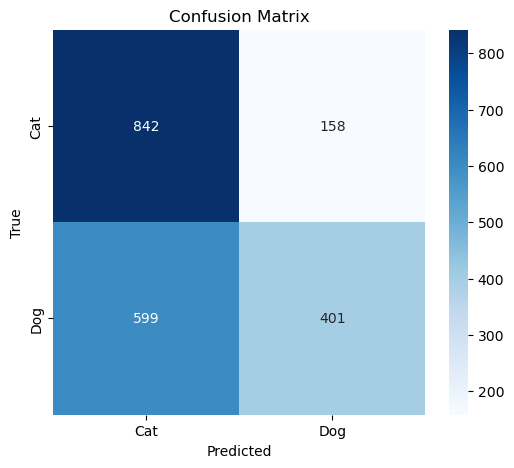

In [48]:
# Визуализация матрицы ошибок
plt.figure(figsize=(6, 5))
sns.heatmap(cm_big, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Вывод: Результат все еще плохой. И снова нейросеть лучше опозднает котиков. Результат с собачками

## Загружаем результаты обучения на аугментированных данных

In [49]:
all_preds_aug_big = np.load(paths['vectors_dir']/"animal_preds_aug.npy")
all_labels_aug_big = np.load(paths['vectors_dir']/"animal_labels_aug.npy")

In [50]:
cm_aug_big = confusion_matrix(all_labels_aug_big, all_preds_aug_big)

In [52]:
cm_aug_big

array([[890, 110],
       [704, 296]])

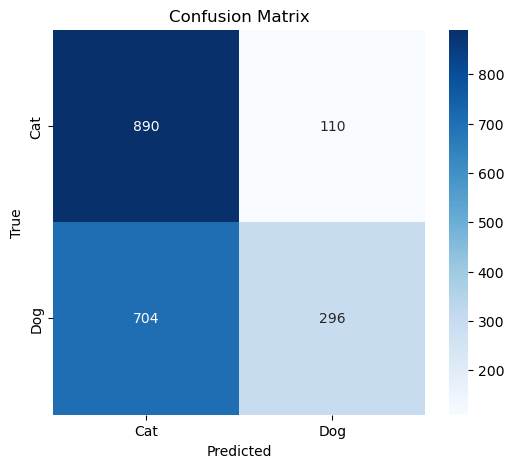

In [51]:
# Визуализация матрицы ошибок
plt.figure(figsize=(6, 5))
sns.heatmap(cm_aug_big, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Accuracy ≈ (890 + 296) / 2000 ≈ 59,3%

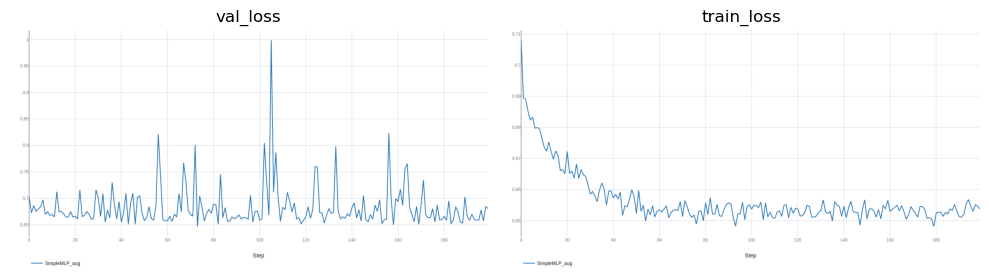

In [57]:
img1 = Image.open(paths['image_dir']/"val_loss.png") 
img2 = Image.open(paths['image_dir']/"train_loss.png") 

# Создаем фигуру с 1 строкой и 2 столбцами
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # (рядов, колонок)

# Отображаем первое изображение
axs[0].imshow(img1)
axs[0].axis('off')
axs[0].set_title("val_loss")

# Отображаем второе изображение
axs[1].imshow(img2)
axs[1].axis('off')
axs[1].set_title("train_loss")

# Показываем все вместе
plt.tight_layout()
plt.show()

### И снова у нас явное переобучение на котиков. Т.е добавление аугментации может усиливать проблему переобучения. И видимо у нас есть дисбаланс классов. Ну и в прципе обучение было весьма плохим

## Попробуем применить простую сверточную сеть

In [58]:
all_preds_cnn = np.load(paths['vectors_dir']/"animal_preds_cnn_noaug(ver1).npy")
all_labels_cnn = np.load(paths['vectors_dir']/"animal_labels_cnn_noaug(ver1).npy")

In [63]:
cm_noaug_cnn = confusion_matrix(all_labels_cnn, all_preds_cnn)

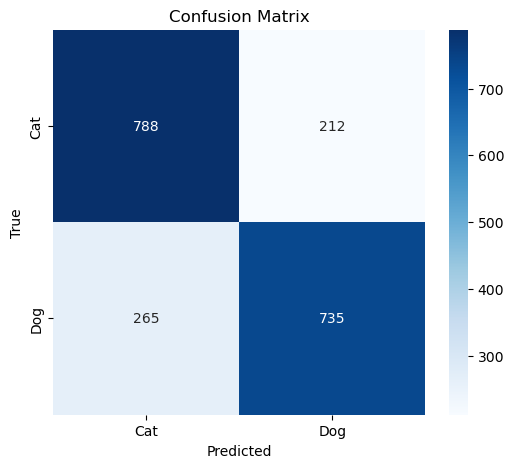

In [64]:
# Визуализация матрицы ошибок
plt.figure(figsize=(6, 5))
sns.heatmap(cm_noaug_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Accuracy ≈ (788 + 735) / 2000 ≈ 76.15%

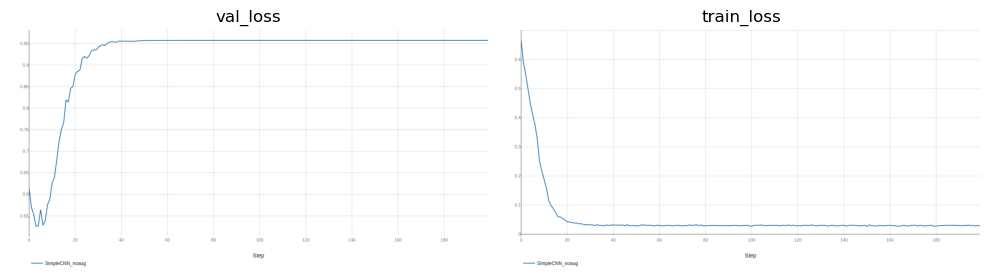

In [62]:
img1 = Image.open(paths['image_dir']/"val_loss_cnn.png") 
img2 = Image.open(paths['image_dir']/"train_loss_cnn.png") 

# Создаем фигуру с 1 строкой и 2 столбцами
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # (рядов, колонок)

# Отображаем первое изображение
axs[0].imshow(img1)
axs[0].axis('off')
axs[0].set_title("val_loss")

# Отображаем второе изображение
axs[1].imshow(img2)
axs[1].axis('off')
axs[1].set_title("train_loss")

# Показываем все вместе
plt.tight_layout()
plt.show()

val_loss
0.956396347284317
train_loss
0.02949867950519547 

### Вывод. не сомотря на максимально странный график val_loss матрица ошибок весь неплохая. Нет явного переобучения. 

## Попробуем улчшить работу со сверточной сетью добавив аугментацию

In [68]:
all_preds_cnn_aug = np.load(paths['vectors_dir']/"animal_preds_cnn_aug.npy")
all_labels_cnn_aug = np.load(paths['vectors_dir']/"animal_labels_cnn_aug.npy")

In [69]:
cm_aug_cnn = confusion_matrix(all_labels_cnn_aug, all_preds_cnn_aug)

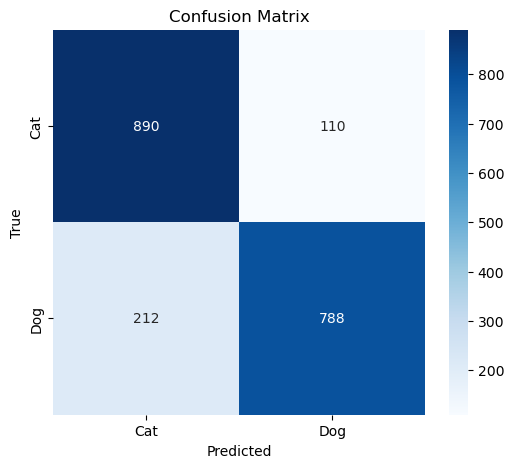

In [70]:
# Визуализация матрицы ошибок
plt.figure(figsize=(6, 5))
sns.heatmap(cm_aug_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Accuracy ≈ (890 + 788) / 2000 ≈ 83,92%

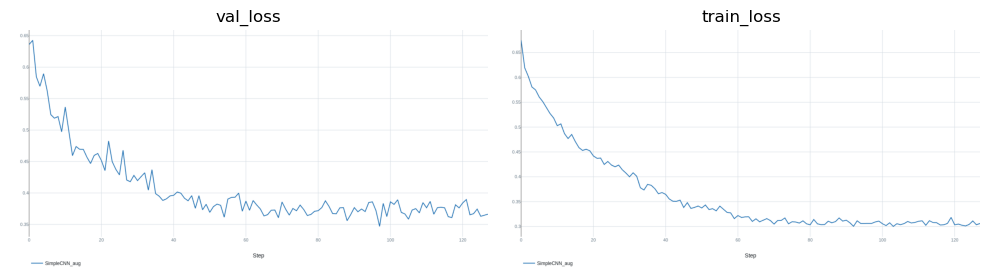

In [71]:
img1 = Image.open(paths['image_dir']/"val_loss_cnn_aug.png") 
img2 = Image.open(paths['image_dir']/"train_loss_cnn_aug.png") 

# Создаем фигуру с 1 строкой и 2 столбцами
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # (рядов, колонок)

# Отображаем первое изображение
axs[0].imshow(img1)
axs[0].axis('off')
axs[0].set_title("val_loss")

# Отображаем второе изображение
axs[1].imshow(img2)
axs[1].axis('off')
axs[1].set_title("train_loss")

# Показываем все вместе
plt.tight_layout()
plt.show()

### Вывод. Граифик оба хорошие и матрица ошибок показала более лучшие результаты что сказалось на Accuracy. Нет  переобучения. Т.е при нормальном наборе данных аугментация способна улучшить результаты.

# Попробуем сделать трансфер нашей обученной модели на первый - малый сет. И посмотреть результаты

In [73]:
all_preds_tranfer = np.load(paths['vectors_dir']/"animal_preds_cnn_transfer_transfer_ver1.npy")
all_labels_tranfer= np.load(paths['vectors_dir']/"animal_labels_cnn_transfer_transfer_ver1.npy")

In [76]:
cm_aug_cnn_tranfer = confusion_matrix(all_labels_tranfer, all_preds_tranfer)

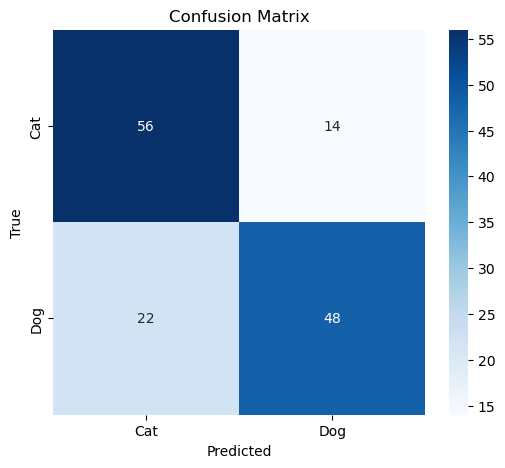

In [77]:
# Визуализация матрицы ошибок
plt.figure(figsize=(6, 5))
sns.heatmap(cm_aug_cnn_tranfer, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Accuracy ≈ (56 + 48) / 140 ≈ 74,28%

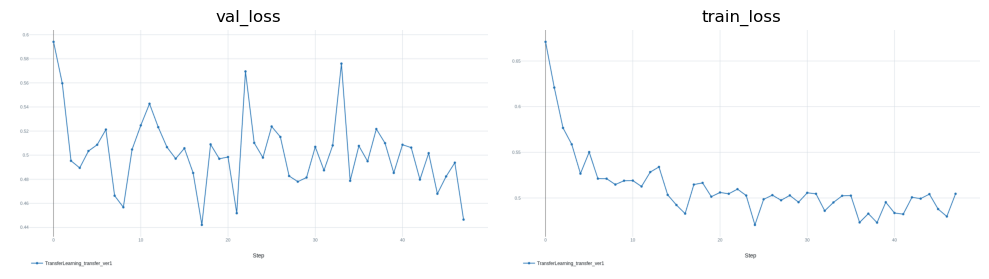

In [79]:
img1 = Image.open(paths['image_dir']/"val_loss_transfer.png") 
img2 = Image.open(paths['image_dir']/"train_loss_transfer.png") 

# Создаем фигуру с 1 строкой и 2 столбцами
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # (рядов, колонок)

# Отображаем первое изображение
axs[0].imshow(img1)
axs[0].axis('off')
axs[0].set_title("val_loss")

# Отображаем второе изображение
axs[1].imshow(img2)
axs[1].axis('off')
axs[1].set_title("train_loss")

# Показываем все вместе
plt.tight_layout()
plt.show()

### Вывод. Граифик оба терпимые (с учетом кол-ва эпох) и матрица ошибок показала существенно более лучшие результаты что сказалось на Accuracy. Нет  переобучения. Т.е трансферная модель помогла получить нормальные матрики на нужной выборке.

## Теперь попробуем трансферную модель на других вариантах бинарной класисифкации (не на кот/собака)

### В начале попробуем на сете Медведка/Панда
https://www.kaggle.com/datasets/mattop/panda-or-bear-image-classification

In [81]:
all_preds_bear = np.load(paths['vectors_dir']/"animal_preds_cnn_transfer_pandasBears.npy")
all_labels_brear= np.load(paths['vectors_dir']/"animal_labels_cnn_transfer_pandasBears.npy")

In [82]:
cm_aug_cnn_bear = confusion_matrix(all_labels_brear, all_preds_bear)

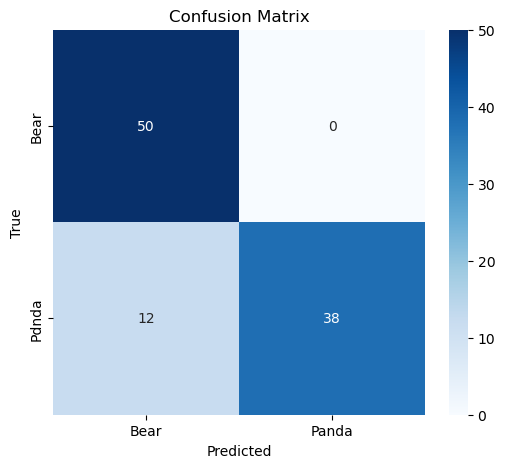

In [83]:
# Визуализация матрицы ошибок
plt.figure(figsize=(6, 5))
sns.heatmap(cm_aug_cnn_bear, annot=True, fmt='d', cmap='Blues', xticklabels=['Bear', 'Panda'], yticklabels=['Bear', 'Pdnda'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
Accuracy ≈ (50 + 38) / 100 ≈ 88%

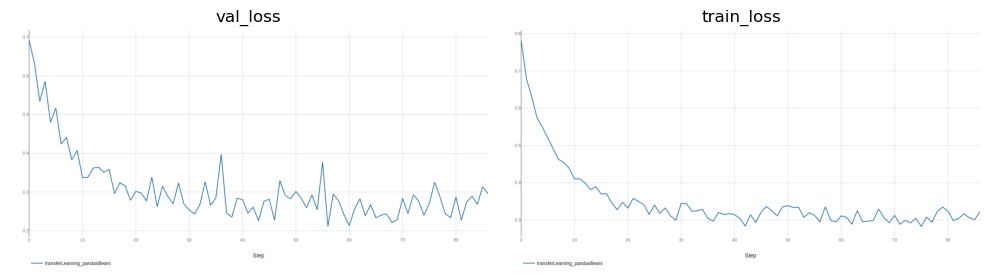

In [85]:
img1 = Image.open(paths['image_dir']/"val_loss_bear.png") 
img2 = Image.open(paths['image_dir']/"train_loss_bear..png") 

# Создаем фигуру с 1 строкой и 2 столбцами
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # (рядов, колонок)

# Отображаем первое изображение
axs[0].imshow(img1)
axs[0].axis('off')
axs[0].set_title("val_loss")

# Отображаем второе изображение
axs[1].imshow(img2)
axs[1].axis('off')
axs[1].set_title("train_loss")

# Показываем все вместе
plt.tight_layout()
plt.show()

### Вывод. На стороннем сете трансферная матрица показала себя хорошо как по графикам так и по матрице ошибок. Точность модели получилась 88%

### Попробуем на совсем стороннем сете Лошади/люди
https://www.kaggle.com/datasets/sanikamal/horses-or-humans-dataset

In [87]:
all_preds_horse = np.load(paths['vectors_dir']/"animal_preds_cnn_transfer_horsehuman.npy")
all_labels_horse= np.load(paths['vectors_dir']/"animal_labels_cnn_transfer_horsehuman.npy")

In [88]:
cm_aug_cnn_horse = confusion_matrix(all_labels_horse, all_preds_horse)

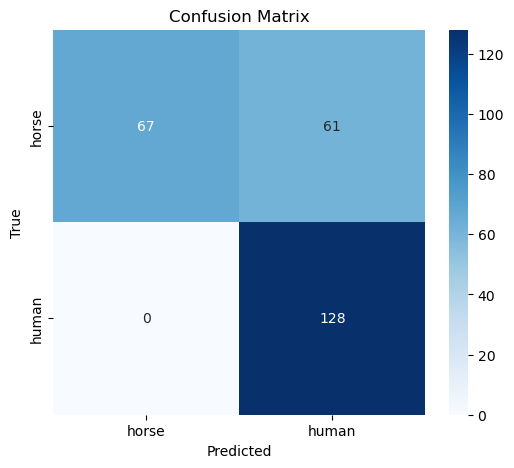

In [89]:
# Визуализация матрицы ошибок
plt.figure(figsize=(6, 5))
sns.heatmap(cm_aug_cnn_horse, annot=True, fmt='d', cmap='Blues', xticklabels=['horse', 'human'], yticklabels=['horse', 'human'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Accuracy ≈ (67 + 128) / 256 ≈ 76%

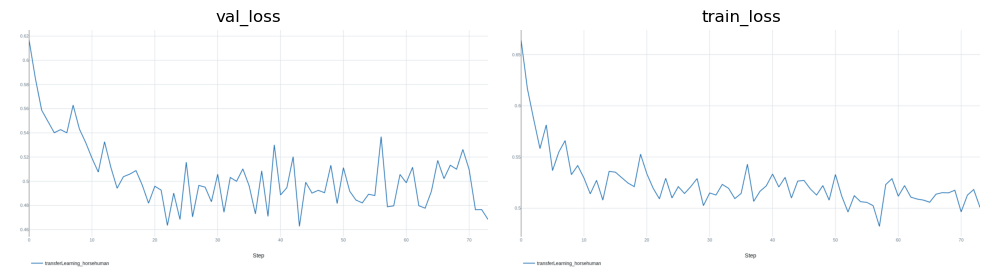

In [90]:
img1 = Image.open(paths['image_dir']/"val_loss_horse.png") 
img2 = Image.open(paths['image_dir']/"train_loss_horse.png") 

# Создаем фигуру с 1 строкой и 2 столбцами
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # (рядов, колонок)

# Отображаем первое изображение
axs[0].imshow(img1)
axs[0].axis('off')
axs[0].set_title("val_loss")

# Отображаем второе изображение
axs[1].imshow(img2)
axs[1].axis('off')
axs[1].set_title("train_loss")

# Показываем все вместе
plt.tight_layout()
plt.show()

### Вывод. Точность высокая но можель плохо справлась с лошадьми. Зато людей опозднала на все 100% Общая точность модели 76%